## Track Analysis

We want to see whether or not our data collection from the ibtracs database is accurate. So we start by counting the number of storms and then plot their paths on a map.

In [2]:
import json
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from tqdm import tqdm

100%|██████████| 4376/4376 [00:01<00:00, 2430.87it/s]


<AxesSubplot:>

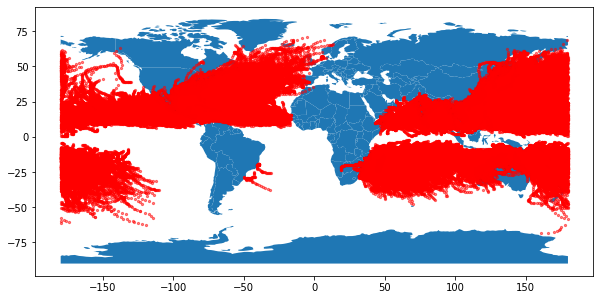

In [4]:
with open('proc_tracks.json', 'r') as tracks_json:
    tracks_dict = json.load(tracks_json)

all_points = []

for sid, data in tqdm(tracks_dict.items()):
    if int(data['season']) < 1980:
        continue

    for coordinate in data['coordinates']:
        all_points.append(Point(float(coordinate[0]), float(coordinate[1])))

gdf = GeoDataFrame(geometry=all_points)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=5, alpha=0.5)